# Lab 1: Exploring NFL Play-By-Play Data

## Data Loading and Preprocessing

To begin, we load the data into a Pandas data frame from a csv file.

In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/data.csv') # read in the csv file

/Users/travissiems/anaconda/envs/testenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's take a cursory glance at the data to see what we're working with.

In [44]:
df.head()

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
0,36,2015-09-10,2015091000,1,1,NaN,15:00,15.0,3600.0,0.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
1,51,2015-09-10,2015091000,1,1,1.0,15:00,15.0,3600.0,0.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
2,72,2015-09-10,2015091000,1,1,1.0,14:21,15.0,3561.0,39.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
3,101,2015-09-10,2015091000,1,1,2.0,14:04,15.0,3544.0,17.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
4,122,2015-09-10,2015091000,1,1,1.0,13:26,14.0,3506.0,38.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015


There's a lot of data that we don't care about. For example, 'PassAttempt' is a binary attribute, but there's also an attribute called 'PlayType' which is set to 'Pass' for a passing play.

We define a list of the columns which we're not interested in, and then we delete them

In [45]:
columns_to_delete = ['Unnamed: 0', 'Date', 'time', 'TimeUnder', 
                     'PosTeamScore', 'PassAttempt', 'RushAttempt', 
                     'DefTeamScore', 'Season', 'PlayAttempted']

#Iterate through and delete the columns we don't want
for col in columns_to_delete:
    if col in df:
        del df[col]

We can then grab a list of the remaining column names

In [46]:
df.columns

Index(['GameID', 'Drive', 'qtr', 'down', 'TimeSecs', 'PlayTimeDiff',
       'SideofField', 'yrdln', 'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo',
       'FirstDown', 'posteam', 'DefensiveTeam', 'desc', 'Yards.Gained', 'sp',
       'Touchdown', 'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety',
       'PlayType', 'Passer', 'PassOutcome', 'PassLength', 'PassLocation',
       'InterceptionThrown', 'Interceptor', 'Rusher', 'RunLocation', 'RunGap',
       'Receiver', 'Reception', 'ReturnResult', 'Returner', 'Tackler1',
       'Tackler2', 'FieldGoalResult', 'FieldGoalDistance', 'Fumble',
       'RecFumbTeam', 'RecFumbPlayer', 'Sack', 'Challenge.Replay',
       'ChalReplayResult', 'Accepted.Penalty', 'PenalizedTeam', 'PenaltyType',
       'PenalizedPlayer', 'Penalty.Yards', 'ScoreDiff', 'AbsScoreDiff'],
      dtype='object')

Temporary simple data replacement so that we can cast to integers (instead of objects)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46129 entries, 0 to 46128
Data columns (total 54 columns):
GameID                46129 non-null int64
Drive                 46129 non-null int64
qtr                   46129 non-null int64
down                  39006 non-null float64
TimeSecs              46102 non-null float64
PlayTimeDiff          46075 non-null float64
SideofField           46063 non-null object
yrdln                 46021 non-null float64
yrdline100            46021 non-null float64
ydstogo               46129 non-null int64
ydsnet                46129 non-null int64
GoalToGo              46021 non-null float64
FirstDown             42811 non-null float64
posteam               42878 non-null object
DefensiveTeam         42878 non-null object
desc                  46129 non-null object
Yards.Gained          46129 non-null int64
sp                    46129 non-null int64
Touchdown             46129 non-null int64
ExPointResult         1131 non-null object
TwoPointConv 

In [48]:
df = df.replace(to_replace=np.nan,value=-1)

At this point, lots of things are encoded as objects, or with excesively large data types

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46129 entries, 0 to 46128
Data columns (total 54 columns):
GameID                46129 non-null int64
Drive                 46129 non-null int64
qtr                   46129 non-null int64
down                  46129 non-null float64
TimeSecs              46129 non-null float64
PlayTimeDiff          46129 non-null float64
SideofField           46129 non-null object
yrdln                 46129 non-null float64
yrdline100            46129 non-null float64
ydstogo               46129 non-null int64
ydsnet                46129 non-null int64
GoalToGo              46129 non-null float64
FirstDown             46129 non-null float64
posteam               46129 non-null object
DefensiveTeam         46129 non-null object
desc                  46129 non-null object
Yards.Gained          46129 non-null int64
sp                    46129 non-null int64
Touchdown             46129 non-null int64
ExPointResult         46129 non-null object
TwoPointConv

We define four lists based on the types of features we're using.
Binary features are separated from the other categorical features so that they can be stored in less space

In [50]:
continuous_features = ['TimeSecs', 'PlayTimeDiff', 'yrdln', 'yrdline100',
                       'ydstogo', 'ydsnet', 'Yards.Gained', 'Penalty.Yards',
                       'ScoreDiff', 'AbsScoreDiff']

ordinal_features = ['Drive', 'qtr', 'down']
binary_features = ['GoalToGo', 'FirstDown','sp', 'Touchdown', 'Safety', 'Fumble']
categorical_features = df.columns.difference(continuous_features).difference(ordinal_features)

We then cast all of the columns to the appropriate underlying data types

In [51]:
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)
df[binary_features] = df[binary_features].astype(np.int8)

THIS IS SOME MORE REFORMATTING SHIT I'M DOING FOR NOW. PROLLY GONNA KEEP IT

In [52]:
df['PassOutcome'].replace(['Complete', 'Incomplete Pass'], [1, 0], inplace=True)

In [53]:
df = df[df["PlayType"] != 'Quarter End']
df = df[df["PlayType"] != 'Two Minute Warning']
df = df[df["PlayType"] != 'End of Game']

Now all of the objects are encoded the way we'd like them to be

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44762 entries, 0 to 46128
Data columns (total 54 columns):
GameID                44762 non-null int64
Drive                 44762 non-null int64
qtr                   44762 non-null int64
down                  44762 non-null int64
TimeSecs              44762 non-null float64
PlayTimeDiff          44762 non-null float64
SideofField           44762 non-null object
yrdln                 44762 non-null float64
yrdline100            44762 non-null float64
ydstogo               44762 non-null float64
ydsnet                44762 non-null float64
GoalToGo              44762 non-null int8
FirstDown             44762 non-null int8
posteam               44762 non-null object
DefensiveTeam         44762 non-null object
desc                  44762 non-null object
Yards.Gained          44762 non-null float64
sp                    44762 non-null int8
Touchdown             44762 non-null int8
ExPointResult         44762 non-null object
TwoPointConv    

Now we can start to take a look at what's in each of our columns

In [55]:
df.describe()

,GameID,Drive,qtr,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,...,InterceptionThrown,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,ScoreDiff,AbsScoreDiff
count,4.476200e+04,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,...,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000,44762.000000
mean,2.015164e+09,12.194920,2.580135,1.611568,1699.955342,20.229860,28.521827,49.954381,7.533399,26.854207,...,0.010455,0.267571,-0.134623,0.014007,0.028238,0.009227,0.078973,0.672311,-1.059336,7.599929
std,2.181743e+05,7.132299,1.134654,1.372797,1064.910674,17.735978,12.630670,24.916942,4.824107,25.428661,...,0.101716,0.442697,5.958572,0.117522,0.165655,0.095612,0.269700,2.755569,10.713988,7.625716
min,2.015091e+09,1.000000,1.000000,-1.000000,-747.000000,-1.000000,-1.000000,-1.000000,0.000000,-48.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-41.000000,-1.000000
25%,2.015101e+09,6.000000,2.000000,1.000000,771.000000,5.000000,20.000000,32.000000,4.000000,5.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,2.000000
50%,2.015111e+09,12.000000,3.000000,2.000000,1800.000000,16.000000,30.000000,51.000000,10.000000,20.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,2589.000000,37.000000,38.000000,72.000000,10.000000,45.000000,...,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,11.000000
max,2.016010e+09,33.000000,5.000000,4.000000,3600.000000,940.000000,50.000000,99.000000,42.000000,99.000000,...,1.000000,1.000000,66.000000,1.000000,1.000000,1.000000,1.000000,55.000000,41.000000,41.000000


In [56]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
#Embed figures in the Jupyter Notebook
%matplotlib inline

#Use GGPlot style for matplotlib
plt.style.use('ggplot')

In [57]:
pass_plays = df[df['PlayType'] == "Pass"]
pass_plays_grouped = pass_plays.groupby(by=['Passer'])

Look at the number of yards gained by a FirstDown

In [58]:
first_downs_grouped = df.groupby(by=['FirstDown'])

print(first_downs_grouped['Yards.Gained'].count())
print("-----------------------------")
print(first_downs_grouped['Yards.Gained'].sum())
print("-----------------------------")
print(first_downs_grouped['Yards.Gained'].sum()/first_downs_grouped['Yards.Gained'].count())

FirstDown
-1     3007
 0    29370
 1    12385
Name: Yards.Gained, dtype: int64
-----------------------------
FirstDown
-1     24201.0
 0     81642.0
 1    119522.0
Name: Yards.Gained, dtype: float64
-----------------------------
FirstDown
-1    8.048221
 0    2.779775
 1    9.650545
Name: Yards.Gained, dtype: float64


Group by play type

In [59]:
plays_grouped = df.groupby(by=['PlayType'])
print(plays_grouped['Yards.Gained'].count())
print("-----------------------------")
print(plays_grouped['Yards.Gained'].sum())
print("-----------------------------")
print(plays_grouped['Yards.Gained'].sum()/plays_grouped['Yards.Gained'].count())

PlayType
Extra Point     1126
Field Goal       988
Kickoff         2565
No Play         2608
Onside Kick       67
Pass           18323
Punt            2429
QB Kneel         425
Run            13129
Sack            1191
Spike             52
Timeout         1859
Name: Yards.Gained, dtype: int64
-----------------------------
PlayType
Extra Point         0.0
Field Goal        197.0
Kickoff         25217.0
No Play          6370.0
Onside Kick        49.0
Pass           133854.0
Punt            11364.0
QB Kneel         -453.0
Run             56627.0
Sack            -7868.0
Spike               0.0
Timeout             8.0
Name: Yards.Gained, dtype: float64
-----------------------------
PlayType
Extra Point    0.000000
Field Goal     0.199393
Kickoff        9.831189
No Play        2.442485
Onside Kick    0.731343
Pass           7.305245
Punt           4.678469
QB Kneel      -1.065882
Run            4.313124
Sack          -6.606213
Spike          0.000000
Timeout        0.004303
Name: Yards.Gaine

We can eliminate combos who didn't have at least 10 receptions together, and then re-sample the data. This will remove noise from QB-receiver combos who have very high or low completion rates because they've played very little together.

([<matplotlib.axis.YTick at 0x129b6e6a0>,
 <a list of 27 Text yticklabel objects>)

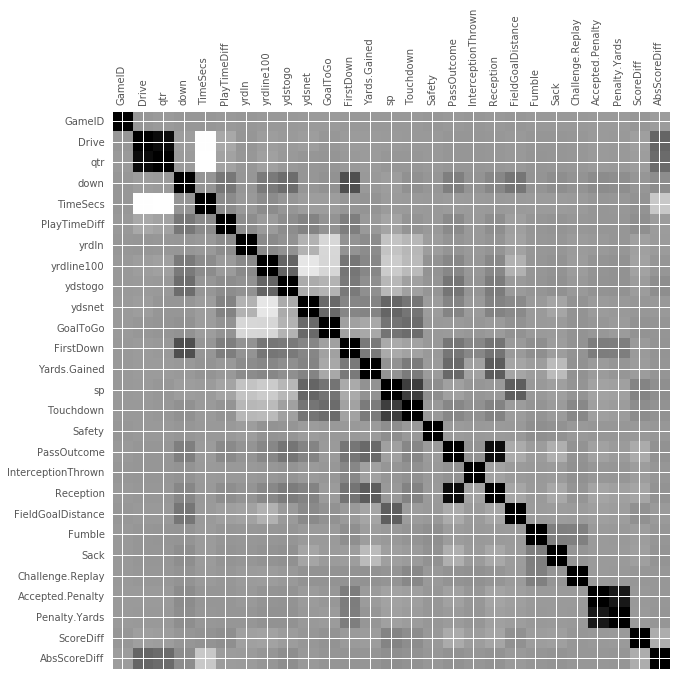

In [60]:
size = 10
corr = df.corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.yticks(range(len(corr.columns)), corr.columns)

We can also extract the highest-completion percentage combos.
Here we take the top-10 most reliable QB-receiver pairs.

In [61]:
import seaborn as sns
%matplotlib inline

In [62]:
# df_dropped = df.dropna()
# df_dropped.info()
selected_types = df.select_dtypes(exclude=["object"])

useful_attributes = df[['FieldGoalDistance','ydstogo']]
print(useful_attributes)

       FieldGoalDistance  ydstogo
0                   -1.0      0.0
1                   -1.0     10.0
2                   -1.0     10.0
3                   -1.0      1.0
4                   -1.0     10.0
5                   -1.0     10.0
6                   -1.0     10.0
7                   -1.0     18.0
8                   -1.0     28.0
9                   -1.0     22.0
10                  44.0     12.0
11                  -1.0     10.0
12                  -1.0     10.0
13                  -1.0     10.0
14                  -1.0     10.0
15                  -1.0     10.0
16                  -1.0     10.0
17                  -1.0     10.0
18                  -1.0     10.0
19                  -1.0      4.0
20                  -1.0      5.0
21                  -1.0     10.0
22                  -1.0     15.0
23                  -1.0     12.0
24                  -1.0     18.0
25                  -1.0      1.0
26                  -1.0     10.0
27                  -1.0      2.0
28            

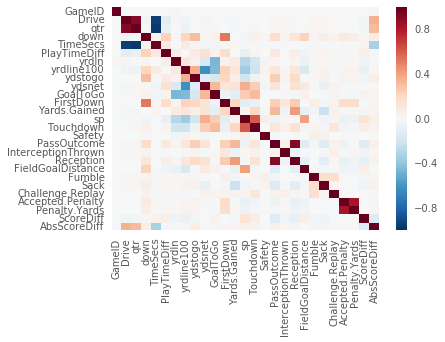

In [63]:
sns.heatmap(corr)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

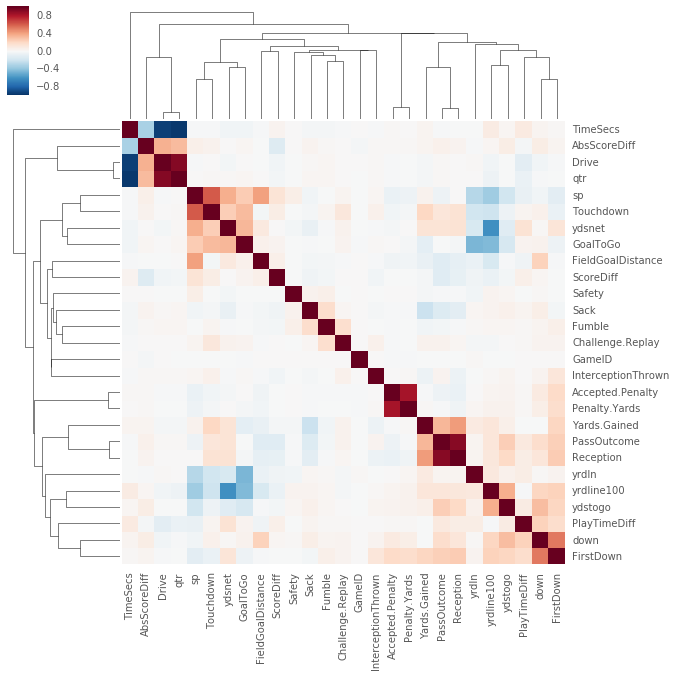

In [64]:
cluster_corr = sns.clustermap(corr)
plt.setp(cluster_corr.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# plt.xticks(rotation=90)


                 FieldGoalDistance  PlayType
FieldGoalResult                             
Blocked                  42.739130       NaN
Good                     36.108747       NaN
No Good                  47.000000       NaN


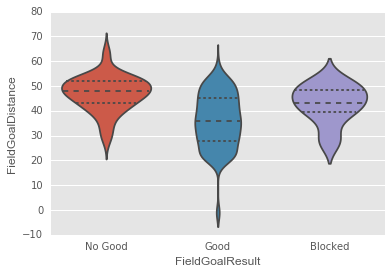

In [65]:
fg_analysis = df[['FieldGoalDistance','FieldGoalResult', 'PlayType']]

fg_analysis = fg_analysis[fg_analysis['FieldGoalResult'] != -1]
fg_grouped = fg_analysis.groupby(by=["FieldGoalResult"])
print(fg_grouped.sum()/fg_grouped.count())


sns.violinplot(x="FieldGoalResult", y="FieldGoalDistance", data=fg_analysis, inner="quart")

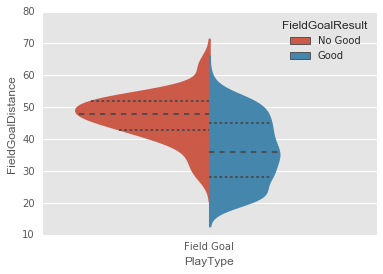

In [66]:
fg_analysis = fg_analysis[fg_analysis['FieldGoalResult'] != "Blocked"]
fg_analysis = fg_analysis[fg_analysis['PlayType'] == "Field Goal"]
sns.violinplot(x = "PlayType", y="FieldGoalDistance",  hue="FieldGoalResult", data=fg_analysis, inner="quart", split = True)

            PassOutcome  PassLocation
PassLength                           
Deep               3431          3431
Short             14762         14762
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18193 entries, 2 to 46128
Data columns (total 3 columns):
PassOutcome     18193 non-null int64
PassLength      18193 non-null object
PassLocation    18193 non-null object
dtypes: int64(1), object(2)
memory usage: 568.5+ KB
PassOutcome              False  True 
PassLength PassLocation              
Deep       left            847    520
           middle          363    362
           right           848    491
Short      left           1673   3778
           middle         1005   2423
           right          1974   3909


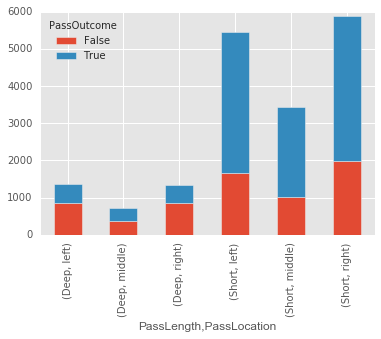

In [67]:
pass_analysis = df[df.PlayType == 'Pass']
pass_analysis = pass_analysis[['PassOutcome','PassLength','PassLocation']]
# print(pass_analysis)


pass_analysis = pass_analysis[pass_analysis.PassLength != -1]
pa_grouped = pass_analysis.groupby(by=['PassLength'])
print(pa_grouped.count())
# pass_analysis['SuccessfulPass'] = pd.cut(df.PassOutcome,[0,1,2],2,labels=['Complete','Incomplete'])

pass_analysis.info()

# Draw a nested violinplot and split the violins for easier comparison
# sns.violinplot(x="PassLocation", y="SuccessfulPass", hue="PassLength", data=pass_analysis, split=True,
#                inner="quart")
# sns.despine(left=True)


pass_info = pd.crosstab([pass_analysis['PassLength'],pass_analysis['PassLocation'] ], 
                       pass_analysis.PassOutcome.astype(bool))
print(pass_info)

pass_info.plot(kind='bar', stacked=True)

In [68]:
df.RunGap.value_counts()

-1        35174
end        3316
guard      3169
tackle     3103
Name: RunGap, dtype: int64

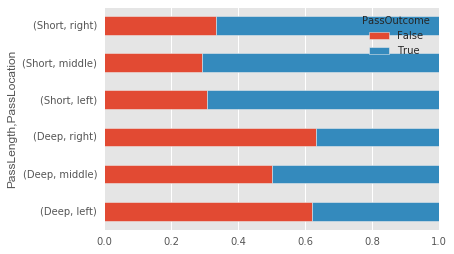

In [69]:
pass_rate = pass_info.div(pass_info.sum(1).astype(float),
                             axis=0) # normalize the value

# print pass_rate
pass_rate.plot(kind='barh', 
                   stacked=True)

In [70]:
# Run data

               Yards.Gained  RunLocation
RunGap                                  
end                    3311         3311
guard                  3165         3165
tackle                 3101         3101
up the middle          3378         3378
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12955 entries, 1 to 46118
Data columns (total 3 columns):
Yards.Gained    12955 non-null float64
RunGap          12955 non-null object
RunLocation     12955 non-null object
dtypes: float64(1), object(2)
memory usage: 404.8+ KB
None


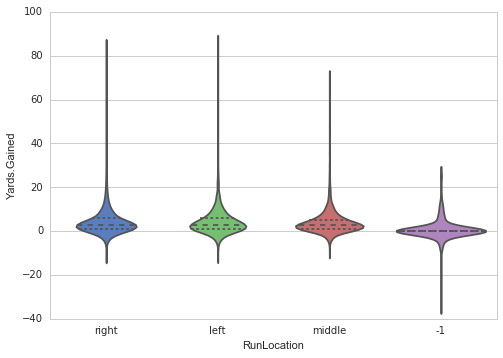

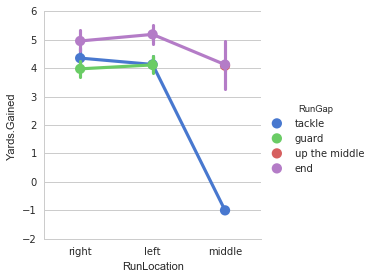

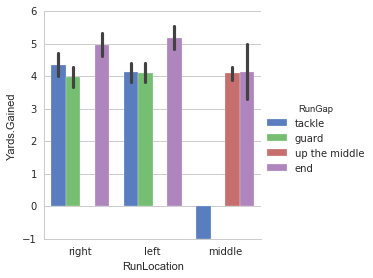

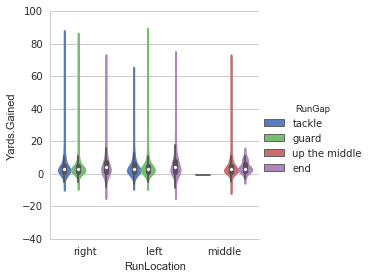

In [78]:
run_analysis = df[df.PlayType == 'Run']
run_analysis = run_analysis[['Yards.Gained','RunGap','RunLocation']]


runlocation_violinplot = sns.violinplot(x="RunLocation", y="Yards.Gained", data=run_analysis, inner="quart")

run_analysis = run_analysis[run_analysis.RunLocation != -1]
run_analysis['RunGap'].replace(-1, 'up the middle',inplace=True)
# run_analysis['RunLocation'].replace(-1, 'no location',inplace=True)


ra_grouped = run_analysis.groupby(by=['RunGap'])

print(ra_grouped.count())
print(run_analysis.info())




sns.set(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
sns.factorplot(x="RunLocation", y="Yards.Gained", hue="RunGap", data=run_analysis)
sns.factorplot(x="RunLocation", y="Yards.Gained", hue="RunGap", data=run_analysis,kind="bar")
sns.factorplot(x="RunLocation", y="Yards.Gained", hue="RunGap", data=run_analysis,kind="violin")

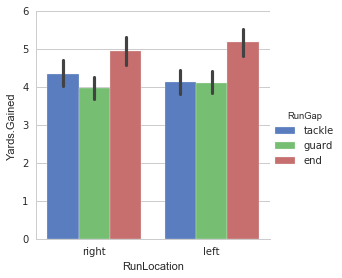

In [84]:
#just compare left and right options

run_lr = run_analysis[(run_analysis['RunLocation'] == 'right') | (run_analysis['RunLocation'] == 'left')]
sns.factorplot(x="RunLocation", y="Yards.Gained", hue="RunGap", data=run_lr,kind="bar")

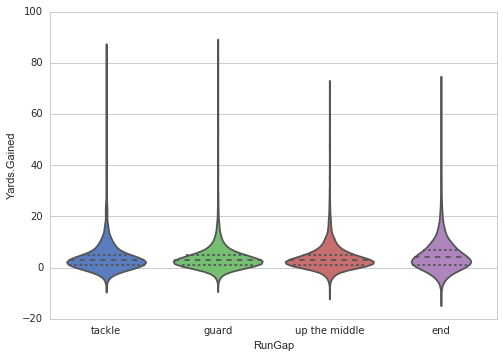

In [77]:
rungap_violinplot = sns.violinplot(x="RunGap", y="Yards.Gained", data=run_analysis, inner="quart")